### What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets?

#### 1. Initialize DataFrame

In [1]:
import pandas as pd
from sklearn.datasets import fetch_20newsgroups

categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']
twenty_train = fetch_20newsgroups(subset='train', categories=categories, \
                                  shuffle=True, random_state=42)
X = pd.DataFrame([" ".join(twenty_train.data[i].split("\n")).strip('\n\t') for i in range(len(twenty_train.data))],columns = ["text"])

I think directly using list comprehension is fine, and we don't need to use dmh to help, because is it let the code tidier.

#### 2. Data Visualization

Heatmap is nice to compare the differences between documents. However, there're many terms and the number of terms in one document is less. Hence, if we randomly select documents and terms to show them in Heatmap, it will show almost all zero in each grids like lab's one. If so, the heatmap will be meaningless.

I think we should select the documents that whose Cosine Similarity scores are higher, and select the terms that whose term frequencies aren't zero.

P.S. because it's hard to show all documents and all terms in one heatmap, we need to "select" some documents and terms to plot it.

In [2]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns
import numpy as np
from collections import Counter

#count term frequency and add it to X as a column
count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text)
X_counts_arr = X_counts.toarray()
X["word_count"] = list(X_counts_arr)

# Calculate Cosine Similarity and sort them
cos_sim = [cosine_similarity([X.loc[50,"word_count"]], [X.loc[i,"word_count"]], dense_output=True) for i in range(X.shape[0])]
X["cos_sim"] = np.array(cos_sim)[:,0,0]
X= X.sort_values(by=['cos_sim'],ascending=False)

#select documents and terms
have_word = np.transpose(np.nonzero(X_counts_arr))
word_index = [x[1] for x in have_word if x[0]<21]
have_word_count = Counter(word_index)
sort_word_count = sorted(have_word_count.items(), key=lambda x:x[1],reverse = True)[1:21]
plot_index = [index[0] for index in sort_word_count]

In [3]:
#produce index name and the values of hwatmap
plot_x = ["term_"+str(count_vect.get_feature_names()[i]) for i in plot_index]
plot_y = ["doc_"+ str(i) for i in list(X.index)[1:21]]
###X_counts.toarray need some time to run
plot_z = [[X_counts.toarray()[list(X.index)[x]][plot_index[y]] for y in range(20)] for x in range(1,21)] 

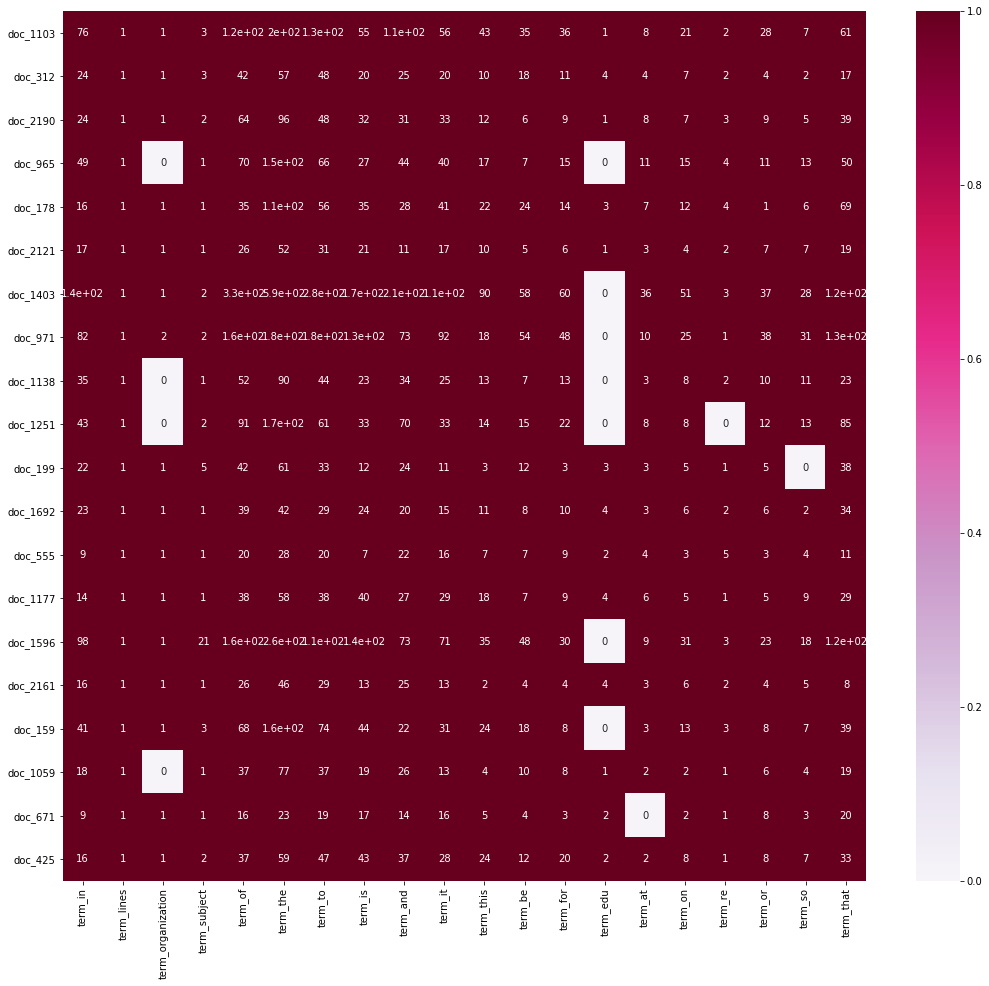

In [4]:
#print the plot
import matplotlib.pyplot as plt
%matplotlib inline

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(18, 16))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=300, annot=True)